### Install Required Libs

In [3]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=0b07a03b56c0a30158c335472331ae98196a7784c6c9b7a7b7cceddd58ea0f02
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [4]:
%load_ext autoreload
%load_ext jupyter_black
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
class_map = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

show_summary = True
show_dataset_analyze = False
show_model_visualize = False

### Get Available Device

In [6]:
from utils import get_device

# Check GPU availability
use_cuda, device = get_device()

print(f"Device:{device}")

Device:cpu


### Prepare datasets & loaders

In [7]:
from transform import get_mnist_transform, get_cifar10_transform
from datasets import get_minst_dataset, get_cifar10_dataset

train_transform = get_cifar10_transform("train")
test_transform = get_cifar10_transform("test")

train_data = get_cifar10_dataset("train", train_transform)
test_data = get_cifar10_dataset("test", test_transform)

100%|██████████| 170498071/170498071 [00:01<00:00, 96072667.20it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
from utils import get_data_loader

kwargs = {
    "batch_size": 512,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_loader = get_data_loader(train_data, kwargs)
test_loader = get_data_loader(test_data, kwargs)

## Dataset  basic Stats

In [9]:
from datasets import print_dataset_bstats

if show_dataset_analyze:
    print_dataset_bstats(train_data)

Data set size: 50000 elements
Image shape: torch.Size([3, 32, 32])
Mean: tensor([-0.1093, -0.1158, -0.1012])
Standard Deviation: tensor([1.0613, 1.0593, 1.0339])


## Calculate Class Scale

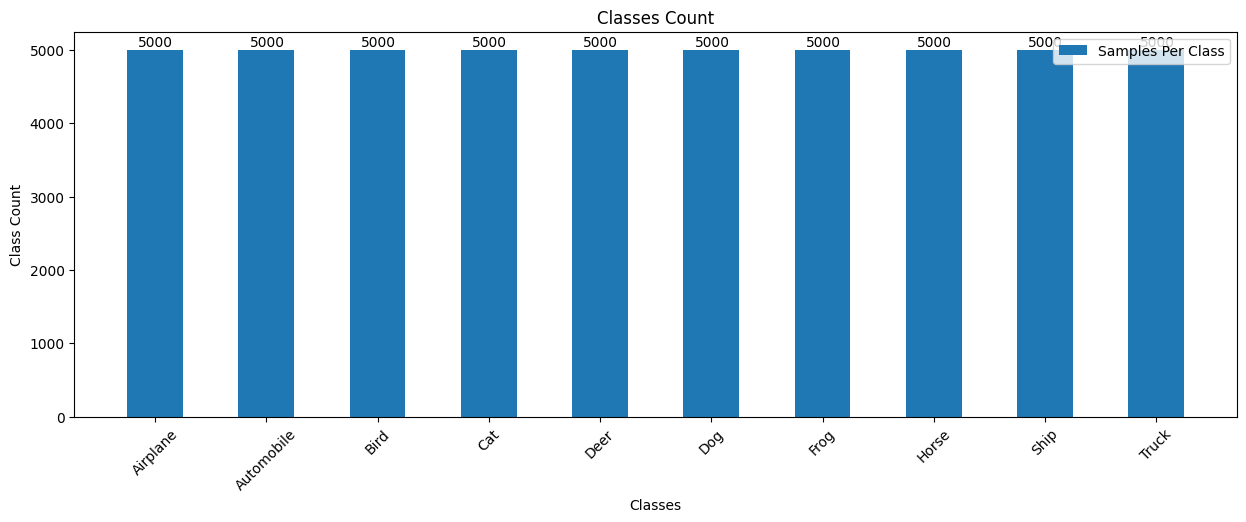

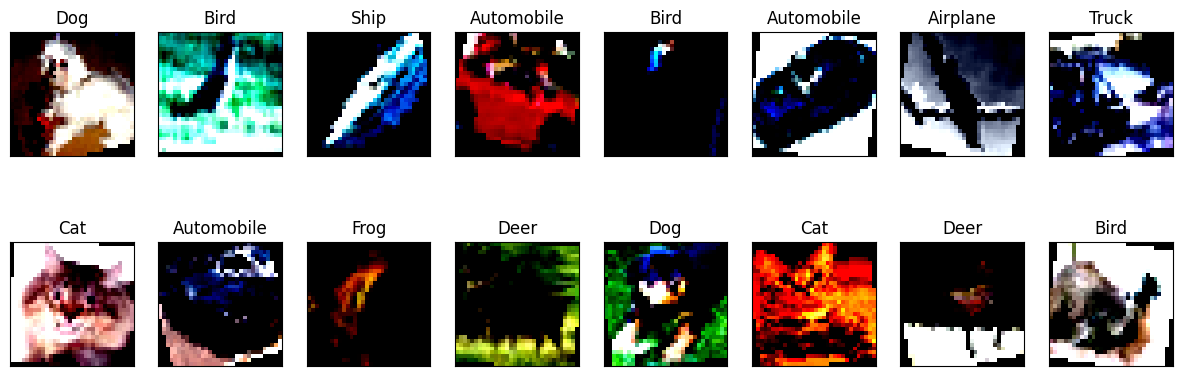

In [10]:
from visualize import print_class_scale, print_samples

if show_dataset_analyze:
    print_class_scale(train_loader, class_map)
    print_samples(train_loader, class_map)

### Save Model's Architecture as png file

In [11]:
from model import Net

if show_model_visualize:
    model = Net().to(device)
    model.model_visualize(device, train_loader, "model")

### Create and run all three model Pipelines

In [12]:
import torch.nn.functional as F

from utils import get_lr_scheduler
from backpropagation import ModelTrainPipeline

dropout = 0.0

trained_models = []
for norm in ["bn", "gn", "ln"]:
    mtp = ModelTrainPipeline(
        criteria=F.cross_entropy,
        train_loader=train_loader,
        test_loader=test_loader,
        epochs=20,
        device=device,
        norm=norm,
        dropout=dropout,
        skip_connets=False,
        model_summary=True,
    )

    trained_models.append(mtp)

    # Start model training.
    mtp.run()

Device: cpu
Normalization: bn
Dropout: 0.0
Skip Connection: False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
       BatchNorm2d-3            [-1, 4, 32, 32]               8
            Conv2d-4            [-1, 8, 32, 32]             288
              ReLU-5            [-1, 8, 32, 32]               0
       BatchNorm2d-6            [-1, 8, 32, 32]              16
            Conv2d-7            [-1, 8, 32, 32]              64
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 16, 16, 16]           1,152
             ReLU-10           [-1, 16, 16, 16]               0
      BatchNorm2d-11           [-1, 16, 16, 16]              32
           Conv2d-12           [-1, 32, 16, 16]           4,608
             ReLU-13           [-1, 3

Train: Loss=2.0584 Batch_id=97 Accuracy=19.46: 100%|██████████| 98/98 [00:47<00:00,  2.07it/s]


Test set: Average loss: 2.0539, Accuracy: 2377/10000 (23.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.9854 Batch_id=97 Accuracy=24.43: 100%|██████████| 98/98 [00:47<00:00,  2.06it/s]


Test set: Average loss: 1.9718, Accuracy: 2547/10000 (25.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.9750 Batch_id=97 Accuracy=26.16: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]


Test set: Average loss: 1.9088, Accuracy: 2778/10000 (27.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.8806 Batch_id=97 Accuracy=28.29: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]


Test set: Average loss: 1.8443, Accuracy: 3026/10000 (30.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.8461 Batch_id=97 Accuracy=30.59: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]


Test set: Average loss: 1.7854, Accuracy: 3356/10000 (33.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.8219 Batch_id=97 Accuracy=32.33: 100%|██████████| 98/98 [00:47<00:00,  2.08it/s]


Test set: Average loss: 2.0151, Accuracy: 2589/10000 (25.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.8103 Batch_id=97 Accuracy=33.47: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


Test set: Average loss: 1.7284, Accuracy: 3553/10000 (35.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.7851 Batch_id=97 Accuracy=34.36: 100%|██████████| 98/98 [00:48<00:00,  2.01it/s]


Test set: Average loss: 1.7158, Accuracy: 3604/10000 (36.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.7427 Batch_id=97 Accuracy=35.22: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]


Test set: Average loss: 1.7048, Accuracy: 3722/10000 (37.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.6446 Batch_id=97 Accuracy=35.83: 100%|██████████| 98/98 [00:47<00:00,  2.08it/s]


Test set: Average loss: 1.6666, Accuracy: 3838/10000 (38.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.6189 Batch_id=97 Accuracy=36.86: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]


Test set: Average loss: 1.6623, Accuracy: 3869/10000 (38.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.6715 Batch_id=97 Accuracy=37.55: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


Test set: Average loss: 1.6552, Accuracy: 3875/10000 (38.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.6751 Batch_id=97 Accuracy=38.21: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]


Test set: Average loss: 1.6158, Accuracy: 4039/10000 (40.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.6714 Batch_id=97 Accuracy=39.34: 100%|██████████| 98/98 [00:50<00:00,  1.96it/s]


Test set: Average loss: 1.6304, Accuracy: 3962/10000 (39.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.6997 Batch_id=97 Accuracy=39.93: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]


Test set: Average loss: 1.6119, Accuracy: 4121/10000 (41.21%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.6485 Batch_id=97 Accuracy=40.36: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]


Test set: Average loss: 1.5805, Accuracy: 4206/10000 (42.06%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.6135 Batch_id=97 Accuracy=40.52: 100%|██████████| 98/98 [00:47<00:00,  2.04it/s]


Test set: Average loss: 1.5726, Accuracy: 4237/10000 (42.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.7029 Batch_id=97 Accuracy=40.71: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]


Test set: Average loss: 1.5740, Accuracy: 4237/10000 (42.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.6572 Batch_id=97 Accuracy=40.80: 100%|██████████| 98/98 [00:49<00:00,  1.96it/s]


Test set: Average loss: 1.5710, Accuracy: 4221/10000 (42.21%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.5175 Batch_id=97 Accuracy=40.59: 100%|██████████| 98/98 [00:47<00:00,  2.04it/s]


Test set: Average loss: 1.5683, Accuracy: 4251/10000 (42.51%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************
Device: cpu
Normalization: gn
Dropout: 0.0
Skip Connection: False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
         GroupNorm-3            [-1, 4, 32, 32]               8
            Conv2d-4            [-1, 8, 32, 32]             288
              ReLU-5            [-1, 8, 32, 32]               0
         GroupNorm-6            [-1, 8, 32, 32]              16
            Conv2d-7            [-1, 8, 32, 32]              64
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 16, 16, 16]           1,152
             ReLU-10           [-1, 16, 16, 16]    

Train: Loss=2.0985 Batch_id=97 Accuracy=18.88: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]


Test set: Average loss: 2.1055, Accuracy: 2116/10000 (21.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.0765 Batch_id=97 Accuracy=21.75: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]


Test set: Average loss: 2.0429, Accuracy: 2318/10000 (23.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.9711 Batch_id=97 Accuracy=24.32: 100%|██████████| 98/98 [00:44<00:00,  2.21it/s]


Test set: Average loss: 1.9707, Accuracy: 2670/10000 (26.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.8903 Batch_id=97 Accuracy=26.55: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]


Test set: Average loss: 1.9170, Accuracy: 2949/10000 (29.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.8712 Batch_id=97 Accuracy=28.29: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]


Test set: Average loss: 1.8687, Accuracy: 3085/10000 (30.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.8702 Batch_id=97 Accuracy=29.36: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]


Test set: Average loss: 1.8314, Accuracy: 3201/10000 (32.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.8149 Batch_id=97 Accuracy=30.52: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]


Test set: Average loss: 1.8274, Accuracy: 3327/10000 (33.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.8006 Batch_id=97 Accuracy=31.67: 100%|██████████| 98/98 [00:45<00:00,  2.18it/s]


Test set: Average loss: 1.7893, Accuracy: 3400/10000 (34.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.6809 Batch_id=97 Accuracy=32.93: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]


Test set: Average loss: 1.8332, Accuracy: 3314/10000 (33.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.7761 Batch_id=97 Accuracy=33.66: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 1.7479, Accuracy: 3547/10000 (35.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.7199 Batch_id=97 Accuracy=35.04: 100%|██████████| 98/98 [00:44<00:00,  2.18it/s]


Test set: Average loss: 1.7166, Accuracy: 3719/10000 (37.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.7162 Batch_id=97 Accuracy=35.94: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]


Test set: Average loss: 1.7554, Accuracy: 3662/10000 (36.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.7534 Batch_id=97 Accuracy=36.87: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]


Test set: Average loss: 1.6907, Accuracy: 3725/10000 (37.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.6721 Batch_id=97 Accuracy=37.04: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]


Test set: Average loss: 1.7267, Accuracy: 3648/10000 (36.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.7443 Batch_id=97 Accuracy=38.08: 100%|██████████| 98/98 [00:43<00:00,  2.27it/s]


Test set: Average loss: 1.6779, Accuracy: 3771/10000 (37.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.6659 Batch_id=97 Accuracy=40.16: 100%|██████████| 98/98 [00:44<00:00,  2.22it/s]


Test set: Average loss: 1.6522, Accuracy: 3925/10000 (39.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.5776 Batch_id=97 Accuracy=40.26: 100%|██████████| 98/98 [00:45<00:00,  2.18it/s]


Test set: Average loss: 1.6519, Accuracy: 3941/10000 (39.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.6457 Batch_id=97 Accuracy=40.17: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 1.6523, Accuracy: 3938/10000 (39.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.6096 Batch_id=97 Accuracy=40.44: 100%|██████████| 98/98 [00:42<00:00,  2.30it/s]


Test set: Average loss: 1.6465, Accuracy: 3951/10000 (39.51%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.6009 Batch_id=97 Accuracy=40.62: 100%|██████████| 98/98 [00:43<00:00,  2.28it/s]


Test set: Average loss: 1.6389, Accuracy: 3973/10000 (39.73%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************
Device: cpu
Normalization: ln
Dropout: 0.0
Skip Connection: False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
         GroupNorm-3            [-1, 4, 32, 32]               8
            Conv2d-4            [-1, 8, 32, 32]             288
              ReLU-5            [-1, 8, 32, 32]               0
         GroupNorm-6            [-1, 8, 32, 32]              16
            Conv2d-7            [-1, 8, 32, 32]              64
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 16, 16, 16]           1,152
             ReLU-10           [-1, 16, 16, 16]    

Train: Loss=2.0683 Batch_id=97 Accuracy=18.31: 100%|██████████| 98/98 [00:44<00:00,  2.23it/s]


Test set: Average loss: 2.0677, Accuracy: 2172/10000 (21.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.0272 Batch_id=97 Accuracy=22.47: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]


Test set: Average loss: 2.0344, Accuracy: 2339/10000 (23.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.0501 Batch_id=97 Accuracy=24.65: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]


Test set: Average loss: 1.9786, Accuracy: 2634/10000 (26.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.9030 Batch_id=97 Accuracy=26.87: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 1.9266, Accuracy: 2742/10000 (27.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.8937 Batch_id=97 Accuracy=28.32: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]


Test set: Average loss: 1.8770, Accuracy: 3103/10000 (31.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.8440 Batch_id=97 Accuracy=29.42: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]


Test set: Average loss: 1.8558, Accuracy: 3124/10000 (31.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.8807 Batch_id=97 Accuracy=30.23: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]


Test set: Average loss: 1.8359, Accuracy: 3241/10000 (32.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.9408 Batch_id=97 Accuracy=31.21: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]


Test set: Average loss: 1.8302, Accuracy: 3363/10000 (33.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.8364 Batch_id=97 Accuracy=32.37: 100%|██████████| 98/98 [00:44<00:00,  2.18it/s]


Test set: Average loss: 1.8053, Accuracy: 3446/10000 (34.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.8403 Batch_id=97 Accuracy=33.18: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]


Test set: Average loss: 1.7722, Accuracy: 3571/10000 (35.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.7711 Batch_id=97 Accuracy=34.25: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]


Test set: Average loss: 1.7574, Accuracy: 3517/10000 (35.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.8105 Batch_id=97 Accuracy=34.84: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]


Test set: Average loss: 1.8242, Accuracy: 3385/10000 (33.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.7421 Batch_id=97 Accuracy=35.76: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]


Test set: Average loss: 1.7311, Accuracy: 3714/10000 (37.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.7258 Batch_id=97 Accuracy=36.15: 100%|██████████| 98/98 [00:44<00:00,  2.21it/s]


Test set: Average loss: 1.6930, Accuracy: 3811/10000 (38.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.6468 Batch_id=97 Accuracy=37.10: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]


Test set: Average loss: 1.6923, Accuracy: 3881/10000 (38.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.6459 Batch_id=97 Accuracy=38.82: 100%|██████████| 98/98 [00:44<00:00,  2.21it/s]


Test set: Average loss: 1.6662, Accuracy: 3957/10000 (39.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.7573 Batch_id=97 Accuracy=39.03: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 1.6618, Accuracy: 3955/10000 (39.55%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.6506 Batch_id=97 Accuracy=38.89: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 1.6604, Accuracy: 3968/10000 (39.68%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.6932 Batch_id=97 Accuracy=38.98: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]


Test set: Average loss: 1.6595, Accuracy: 3971/10000 (39.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.6539 Batch_id=97 Accuracy=38.96: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s]


Test set: Average loss: 1.6538, Accuracy: 3992/10000 (39.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************


## Training & Test accuracies for all models

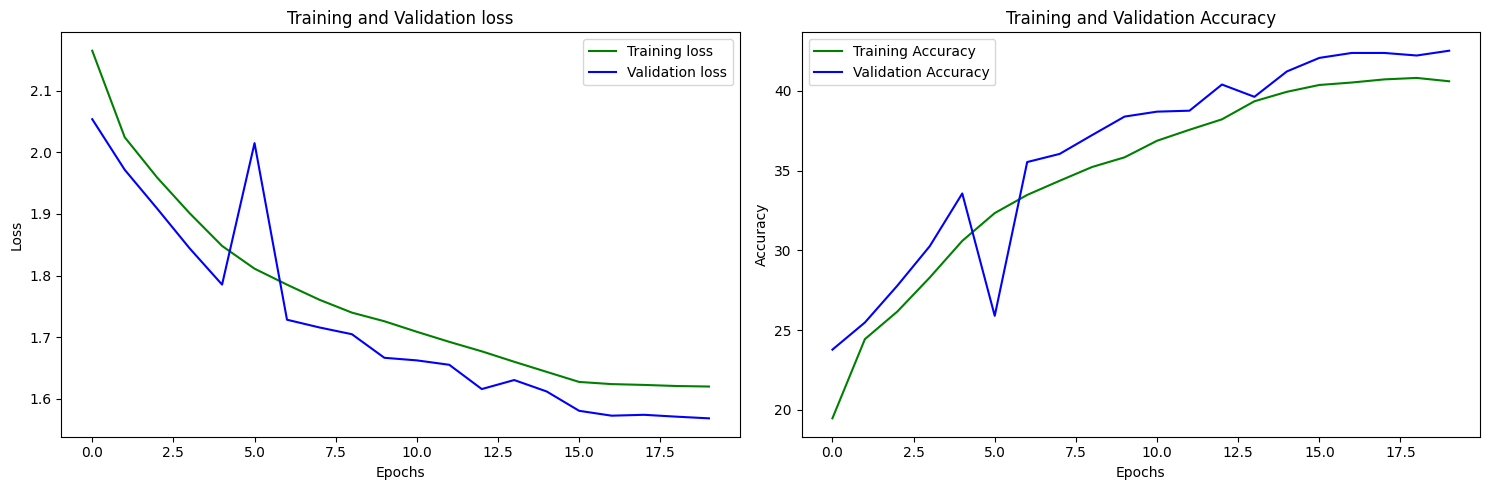

Confusion matrix, without normalization


Total Incorrect Predictions 5749


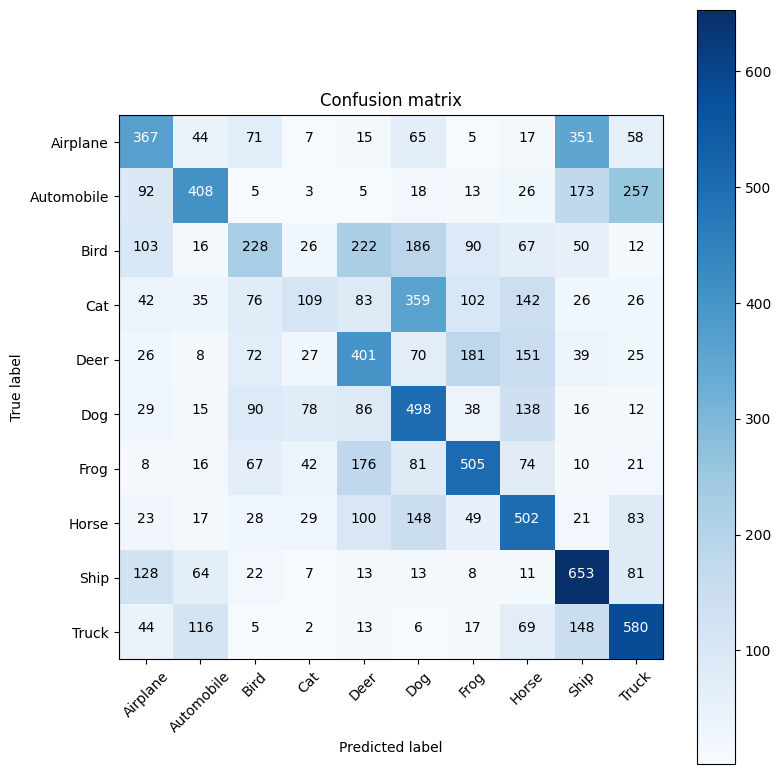

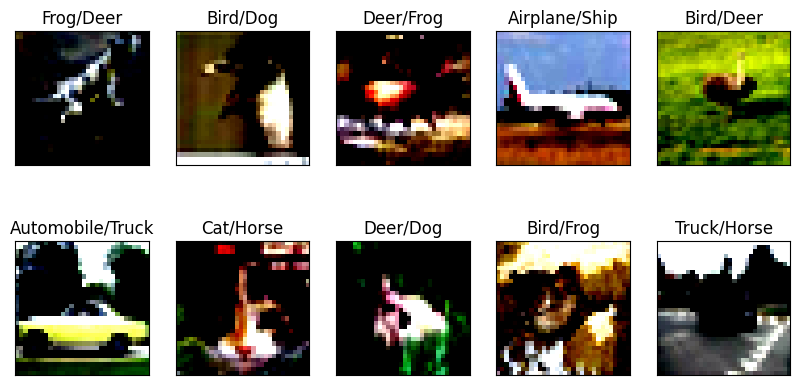

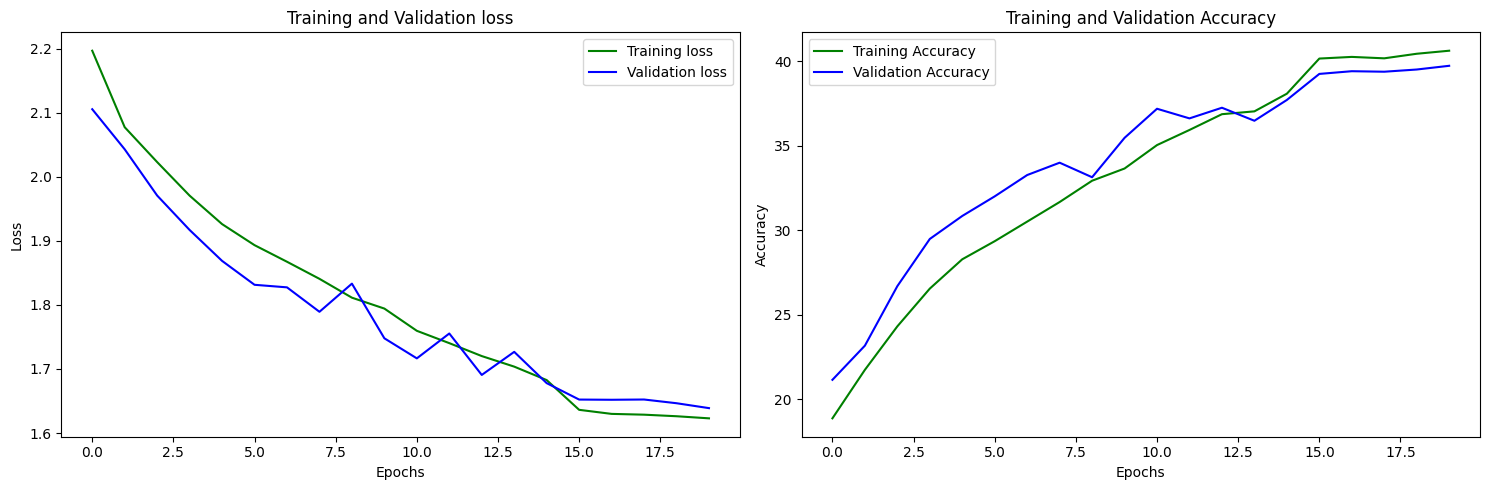

Confusion matrix, without normalization


Total Incorrect Predictions 6027


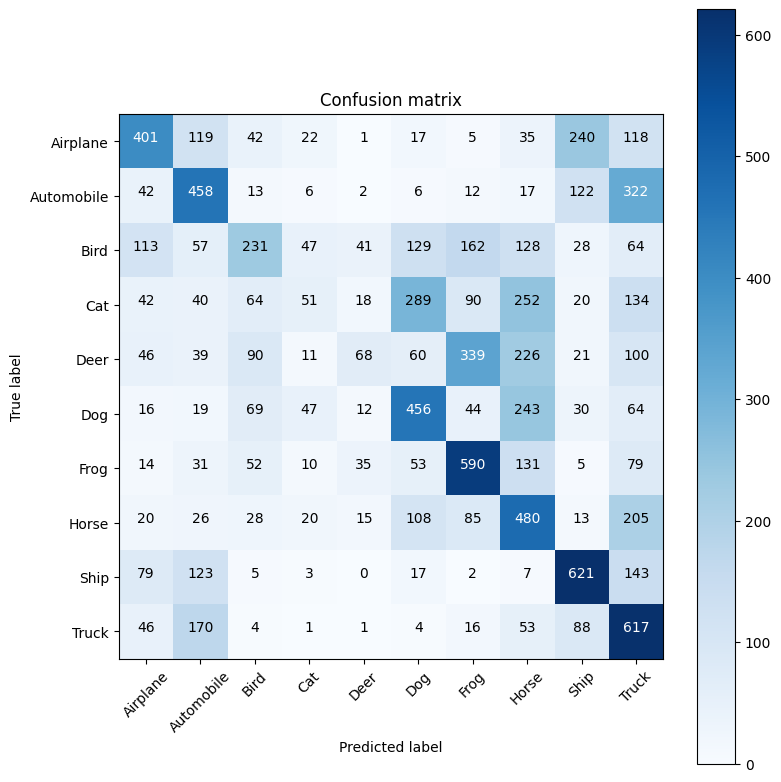

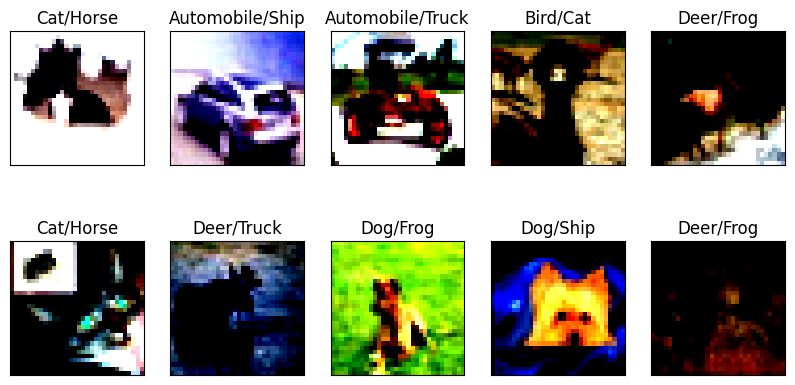

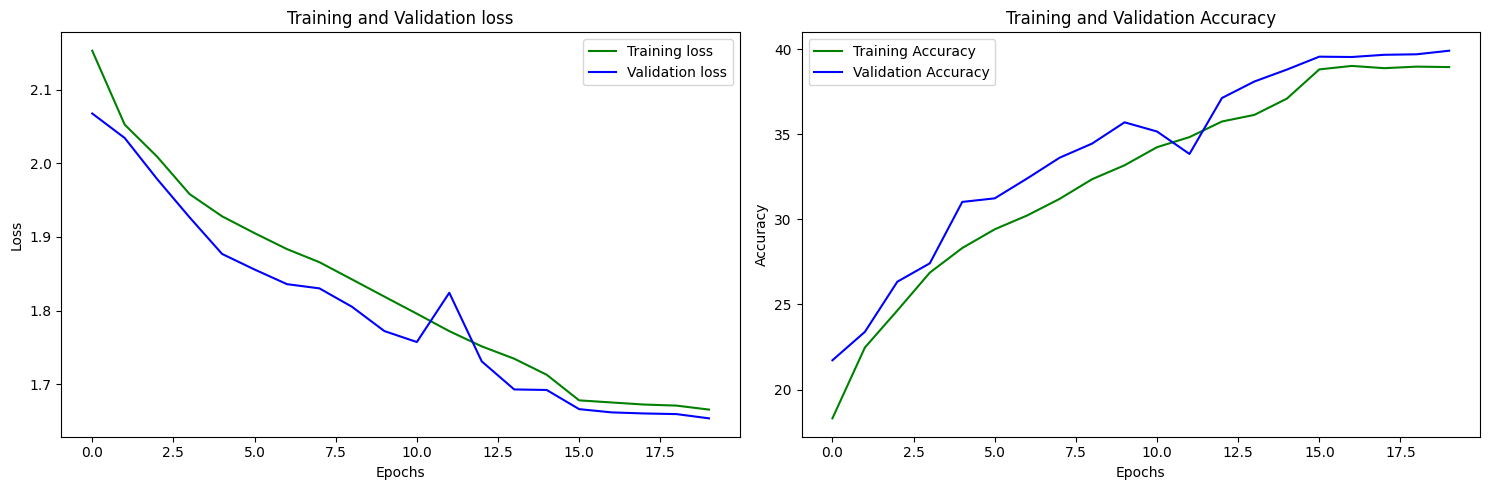

Confusion matrix, without normalization


Total Incorrect Predictions 6008


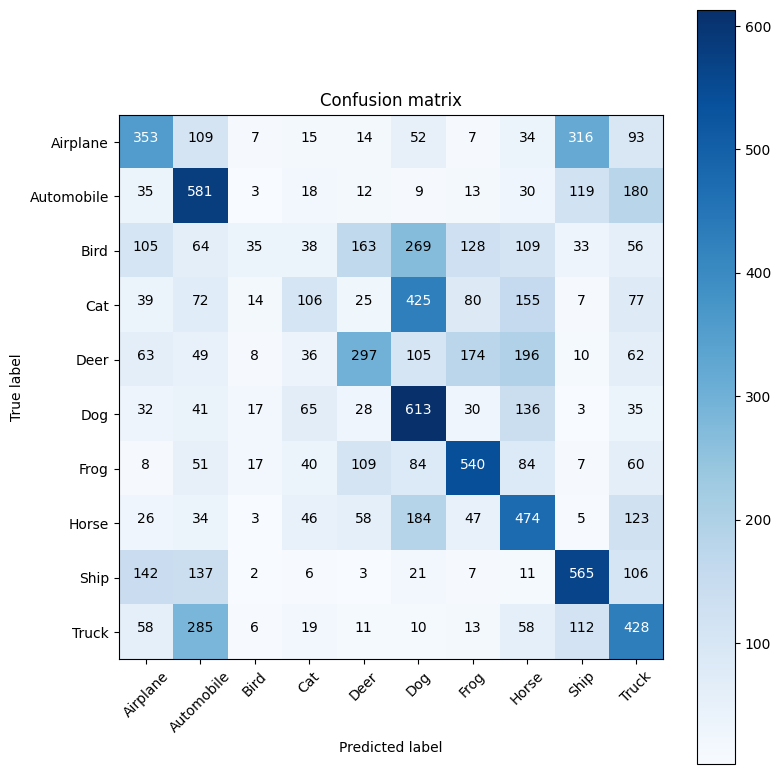

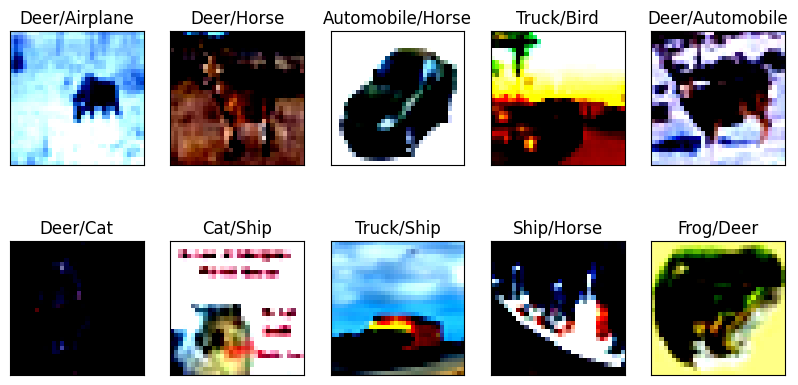

In [13]:
for i, trainer in enumerate(trained_models):
    trainer.print_performance(class_map)

## Confusion Matrix

Confusion matrix, without normalization


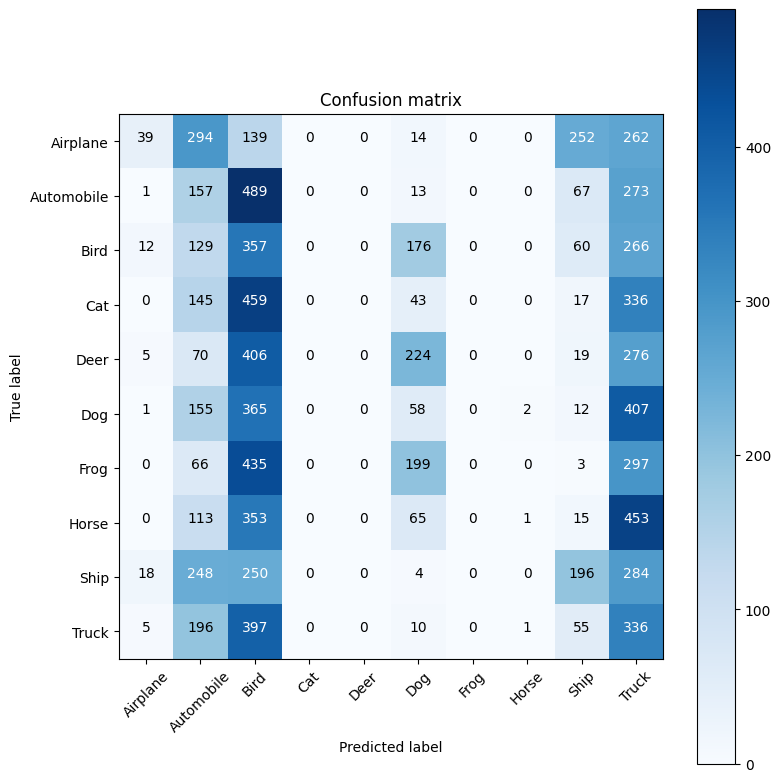

In [14]:
from utils import get_test_predictions
from utils import prepare_confusion_matrix
from visualize import plot_confusion_matrix

test_preds, test_targets = get_test_predictions(model, test_loader, device)

# Confusion Matrix
confusion_matrix = prepare_confusion_matrix(test_preds, test_targets, class_map)
plot_confusion_matrix(confusion_matrix, class_map)

## Misclassified Images

Total Incorrect Predictions 8856


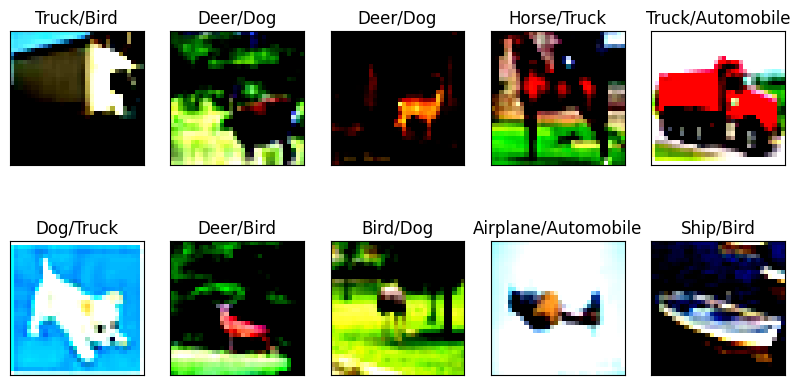

In [15]:
from utils import get_incorrrect_predictions
from visualize import plot_incorrect_predictions

# Misclassified Images
wrong_predicts = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(wrong_predicts, class_map, count=10)